In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor


In [3]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [4]:
file_path = r"C:\Users\muski\Desktop\NewProject\NYC\AB_NYC_2019.csv"

In [5]:
# read file
df = pd.read_csv(file_path)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
#Remove Duplicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [9]:
#Check for the null values in each column

df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:
#Drop unnecessary columns
df.drop(['name','id','host_name','last_review'], axis=1, inplace=True)

In [11]:
df.sample(5)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
16679,75561563,Manhattan,Upper East Side,40.76284,-73.96038,Entire home/apt,150,1,25,0.67,1,0
40529,188741104,Manhattan,Harlem,40.81027,-73.94306,Entire home/apt,175,31,3,0.63,4,274
34399,204527108,Brooklyn,Williamsburg,40.71796,-73.95700,Private room,87,30,2,2.00,3,310
18085,1876539,Brooklyn,Prospect-Lefferts Gardens,40.65813,-73.95773,Entire home/apt,150,6,9,0.26,1,0
38866,224315550,Brooklyn,Williamsburg,40.71043,-73.96505,Private room,90,2,27,3.84,2,56


In [12]:
#replace the 'reviews per month' by zero

df.fillna({'reviews_per_month':0}, inplace=True)
df.reviews_per_month.isnull().sum()

0

In [13]:
df.sample(5)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
14264,30918593,Manhattan,Hell's Kitchen,40.76578,-73.99309,Entire home/apt,120,1,0,0.00,1,0
17034,6445320,Manhattan,Upper West Side,40.79415,-73.97323,Private room,90,5,3,0.08,1,66
42332,145878384,Brooklyn,Crown Heights,40.67248,-73.92962,Private room,70,5,2,1.54,7,308
38522,782801,Brooklyn,Bedford-Stuyvesant,40.68677,-73.95522,Entire home/apt,125,1,9,1.36,1,192
38196,226410657,Brooklyn,Bedford-Stuyvesant,40.68770,-73.93146,Private room,42,30,2,0.47,27,353


In [14]:
# Remove the NaN values from the dataset

df.isnull().sum()
df.dropna(how='any',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   reviews_per_month               48895 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(6), object(

In [15]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Top NeighbourHood

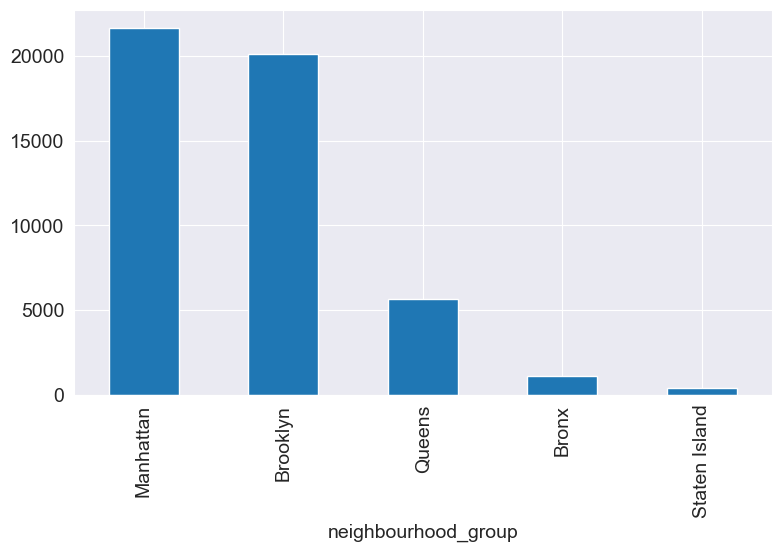

In [16]:
top_neighbourhood = df.neighbourhood_group.value_counts()
top_neighbourhood.plot(kind='bar');

### Host with highest amount of listings


In [17]:
top_hosts = df['host_id'].value_counts().head(10)
top_hosts

host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: count, dtype: int64

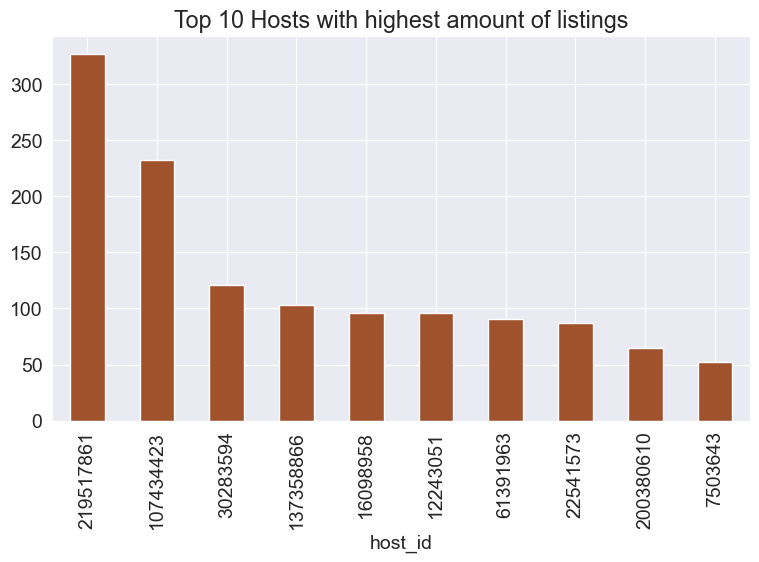

In [18]:
top_hosts.plot(kind='bar', title= 'Top 10 Hosts with highest amount of listings', color = 'sienna');

### 10 most reviewed listings

In [19]:
top_reviewed_listings=df.nlargest(10,'number_of_reviews')
top_reviewed_listings

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


In [21]:
avg_price = top_reviewed_listings.price.mean()
print('Average price per night: ${}'.format(avg_price))

Average price per night: $65.4


### Top 10 Cheapest Neighbourhood


In [22]:
cheap_hood = df.groupby('neighbourhood')['price'].mean().nsmallest(10)
cheap_hood

neighbourhood
Bull's Head       47.333333
Hunts Point       50.500000
Tremont           51.545455
Soundview         53.466667
New Dorp          57.000000
Bronxdale         57.105263
New Dorp Beach    57.400000
Grant City        57.666667
Concord           58.192308
Mount Eden        58.500000
Name: price, dtype: float64

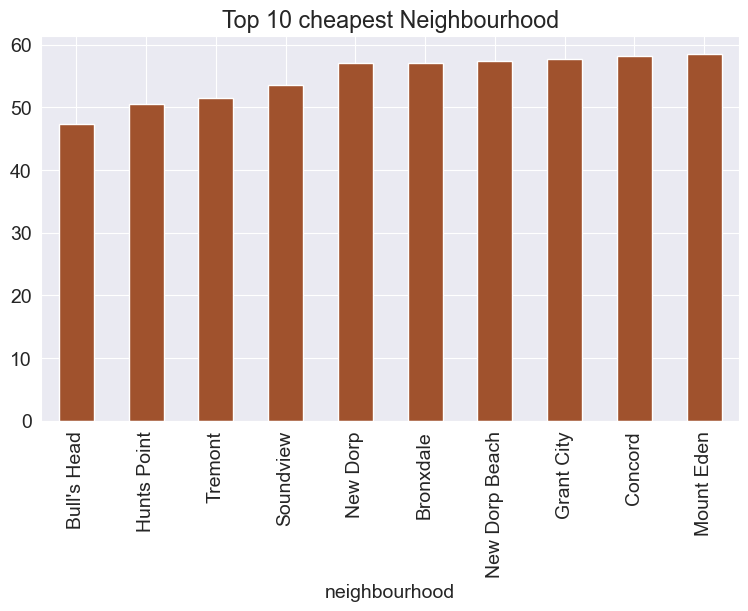

In [23]:
cheap_hood.plot(kind='bar', title = 'Top 10 cheapest Neighbourhood', color = 'sienna');

### Top 10 Expensve Neighbourhood


In [24]:
expensive_hood = df.groupby('neighbourhood')['price'].mean().nlargest(10)
expensive_hood

neighbourhood
Fort Wadsworth       800.000000
Woodrow              700.000000
Tribeca              490.638418
Sea Gate             487.857143
Riverdale            442.090909
Prince's Bay         409.500000
Battery Park City    367.557143
Flatiron District    341.925000
Randall Manor        336.000000
NoHo                 295.717949
Name: price, dtype: float64

<Axes: title={'center': 'Top 10 Expensive Neighbourhood'}, xlabel='neighbourhood'>

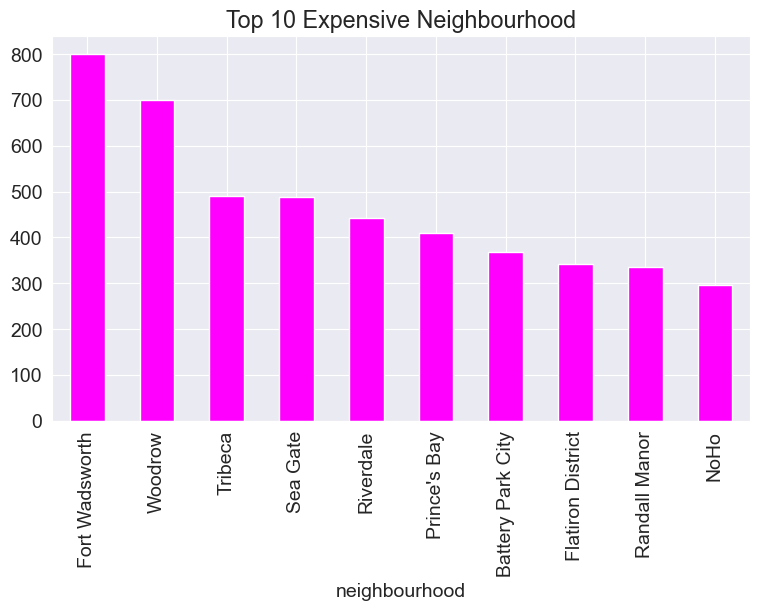

In [25]:
expensive_hood.plot(kind='bar', title='Top 10 Expensive Neighbourhood', color = 'magenta')

### Get Correlation


In [26]:
numeric_df = df.select_dtypes(include='number')

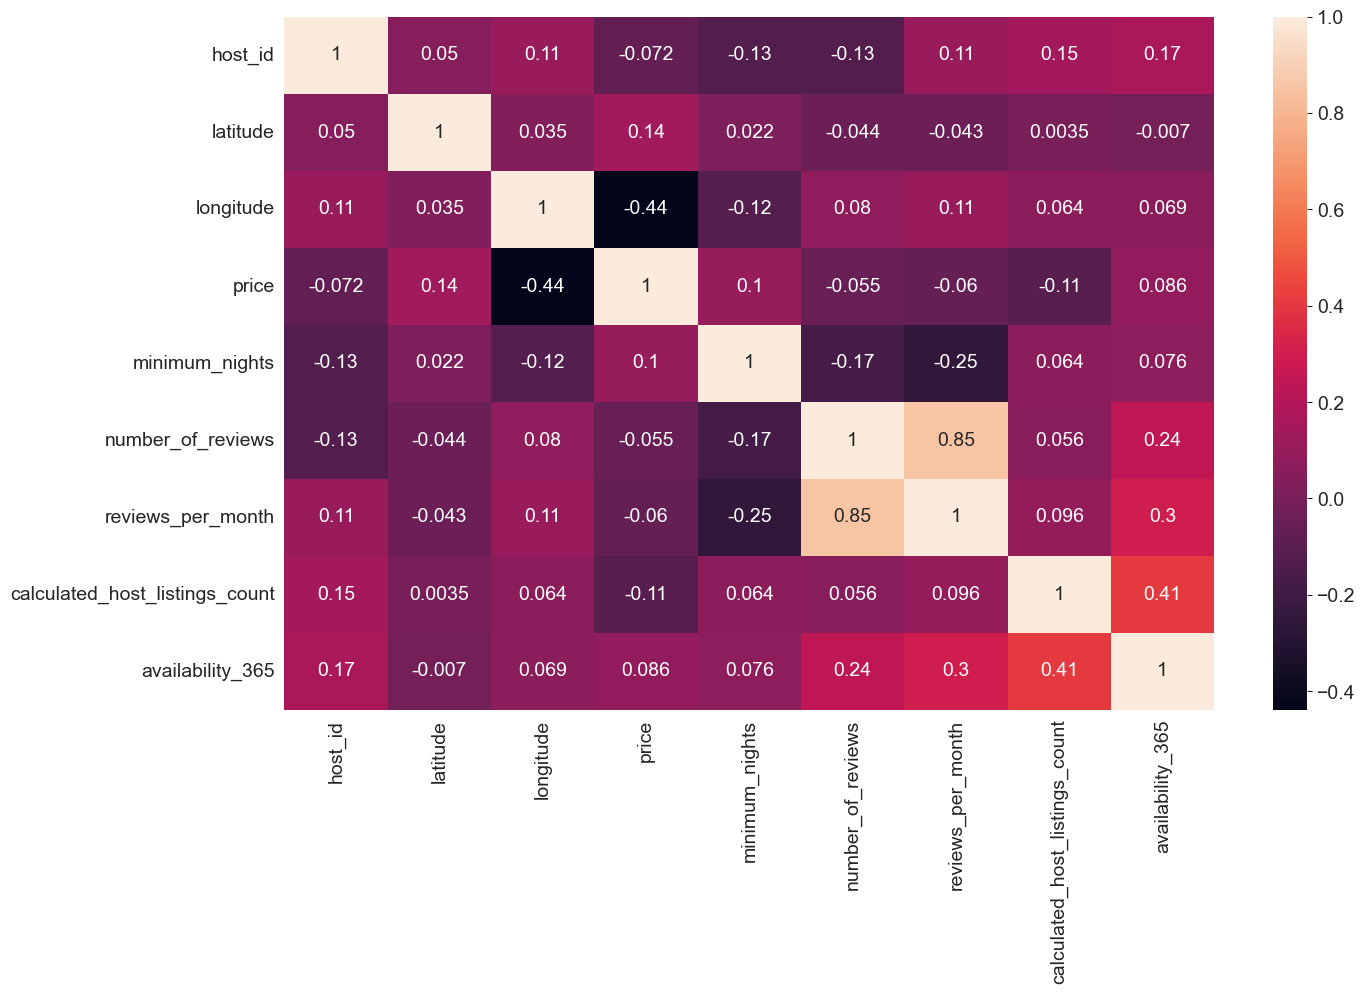

In [27]:
corr = numeric_df.corr(method='spearman')
plt.figure(figsize=(15,9))
sns.heatmap(corr, annot=True)
df.columns;

### Rooms

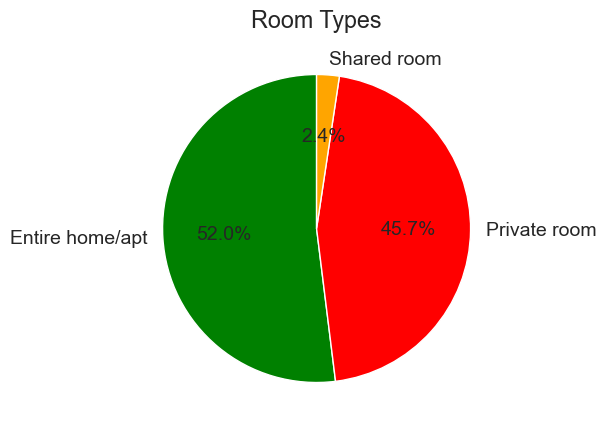

In [30]:
room_types = df['room_type'].value_counts()
plt.pie(room_types, labels=room_types.index, autopct='%1.1f%%', startangle=90, 
        colors=['green', 'red', 'orange'])
plt.title('Room Types')
plt.show()


### Neighbourgroup and Availability of Room

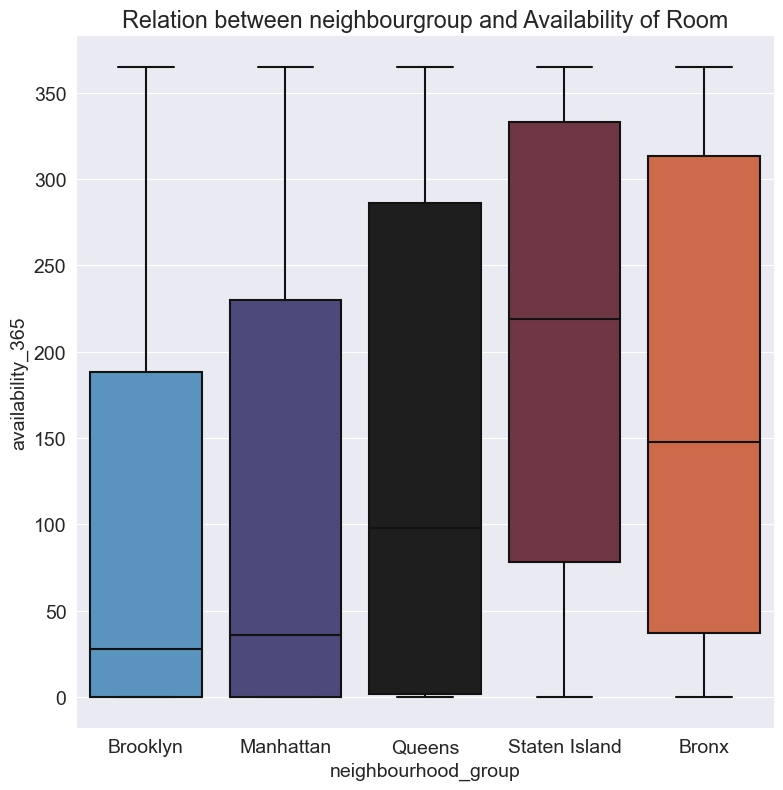

In [27]:
plt.figure(figsize=(9,9))
plt.title('Relation between neighbourgroup and Availability of Room')
ax = sns.boxplot(data=df, x='neighbourhood_group',y='availability_365',palette='icefire')

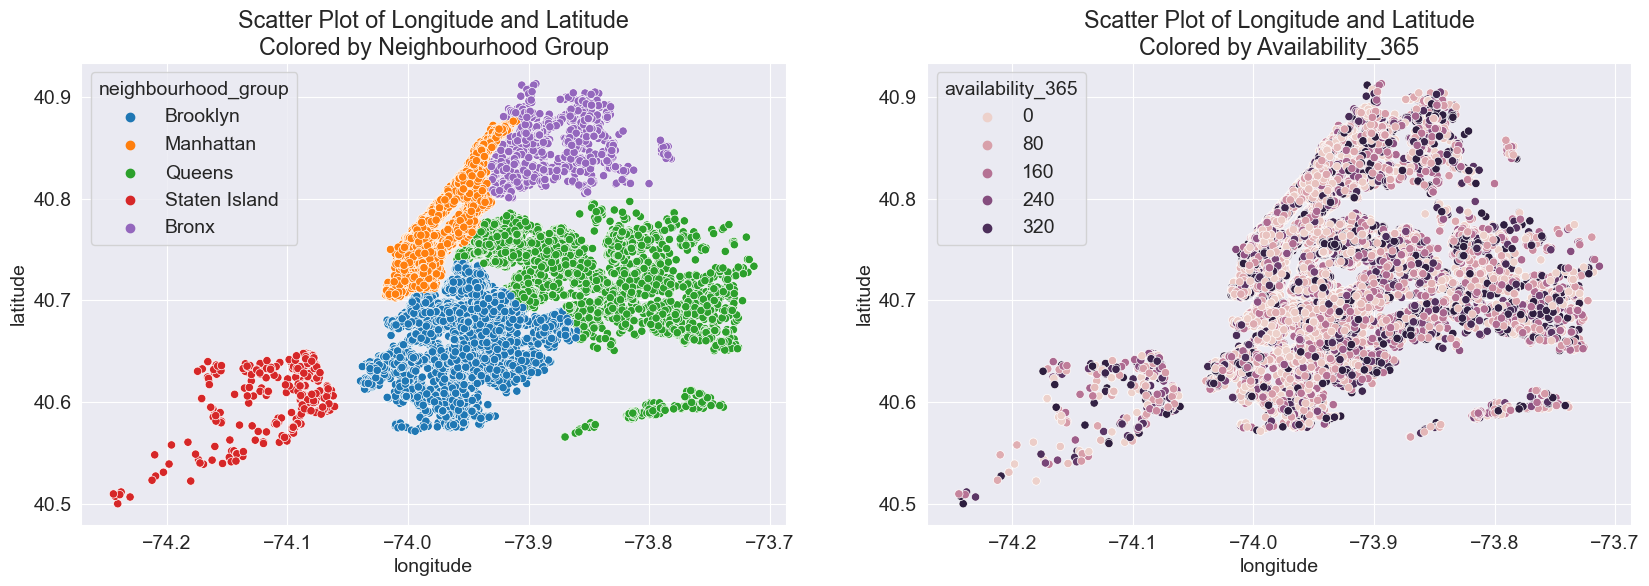

In [28]:
# Set up a 1x2 grid for subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Scatter plot with neighbourhood_group
sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood_group', ax=axes[0])
axes[0].set_title('Scatter Plot of Longitude and Latitude\nColored by Neighbourhood Group')

# Scatter plot with availability_365
sns.scatterplot(data=df, x='longitude', y='latitude', hue='availability_365', ax=axes[1])
axes[1].set_title('Scatter Plot of Longitude and Latitude\nColored by Availability_365')

plt.show();

### Regression Analysis


In [29]:
df.sample()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
19586,8832456,Brooklyn,Kensington,40.64381,-73.97018,Private room,54,1,132,4.03,1,70


In [30]:
df.drop(['host_id','latitude','longitude','neighbourhood','number_of_reviews','reviews_per_month'], axis=1, inplace=True)
df.head(5)

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,149,1,6,365
1,Manhattan,Entire home/apt,225,1,2,355
2,Manhattan,Private room,150,3,1,365
3,Brooklyn,Entire home/apt,89,1,1,194
4,Manhattan,Entire home/apt,80,10,1,0


In [31]:
#Factorise the input Variables
def Encode(df):
    for column in df.columns[df.columns.isin(['neighbourhood_group', 'room_type'])]:
        df[column] = df[column].factorize()[0]
    return df

df_en = Encode(df.copy())

In [32]:
df_en.head(5)

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,0,0,149,1,6,365
1,1,1,225,1,2,355
2,1,0,150,3,1,365
3,0,1,89,1,1,194
4,1,1,80,10,1,0


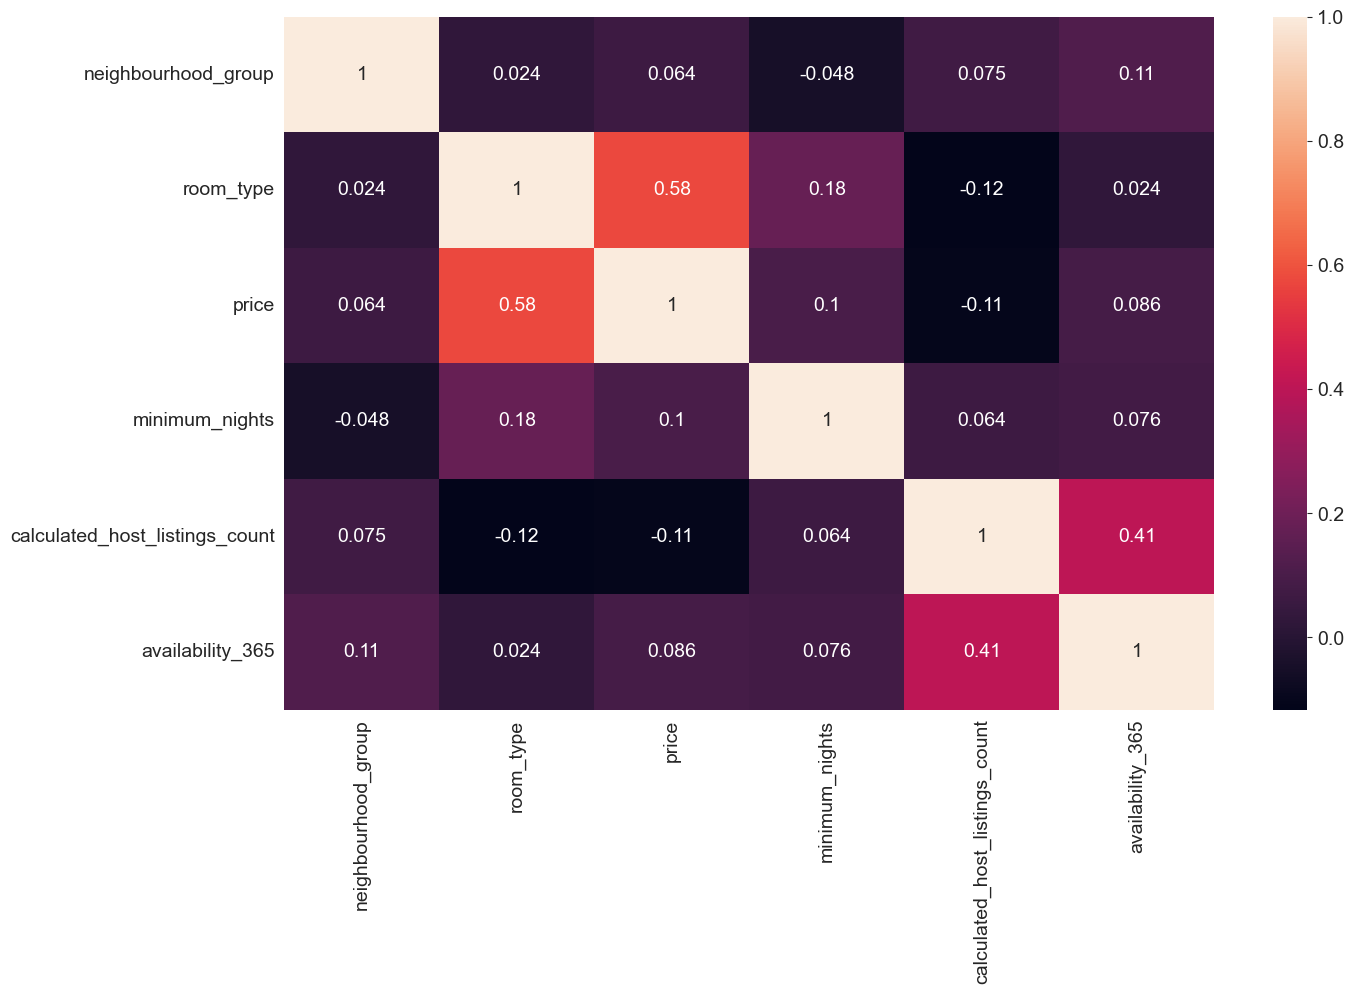

In [40]:
#Get Correlation between different variables

corr = df_en.corr(method='spearman')
plt.figure(figsize=(15,9))
sns.heatmap(corr, annot=True)
df_en.columns;

In [34]:
corr = df_en.corr(method='spearman')
corr

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
neighbourhood_group,1.000000,0.023661,0.063684,-0.047979,0.075166,0.114834
room_type,0.023661,1.000000,0.575225,0.176824,-0.116397,0.023990
price,0.063684,0.575225,1.000000,0.101289,-0.106083,0.086088
minimum_nights,-0.047979,0.176824,0.101289,1.000000,0.064117,0.075981
calculated_host_listings_count,0.075166,-0.116397,-0.106083,0.064117,1.000000,0.406606
availability_365,0.114834,0.023990,0.086088,0.075981,0.406606,1.000000


In [35]:
df_en.columns

Index(['neighbourhood_group', 'room_type', 'price', 'minimum_nights',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [36]:
#Defining the independent variables and dependent variables
x = df_en.iloc[:,[0,1,3,4,5]]
y = df_en['price']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()
y_train.head()

17736    125
24351    101
10069    189
11679    145
16315    120
Name: price, dtype: int64

In [37]:
#Prepare a Linear Regression Model

reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
r2_score(y_test,y_pred)

0.07480306392848768

In [38]:
#Prepairng a Decision Tree Regression

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
r2_score(y_test,y_predict)

0.2534090076566696